<a href="https://colab.research.google.com/github/MeledjeLaroche/MNIST_standard_calssification/blob/main/ProjetMNIST_AGNIMEL_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Auteur: MELEDJE LAROCHE
* Institut National Félix Houphouët Boigny (INP-HB) / International Data Science Institute (IDSI) 

## Projet : Réseau de neurones avec keras sur la base de données MNIST

* Lancement de l'environnement python

In [1]:
print("hello : M. Laroche")

hello : M. Laroche


I Q1 : Importation et affichage de l’ensemble de données MNIST

In [2]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data() 
train_X, test_X = train_X/255, test_X/255 
print('training data:', type(train_X), train_X.shape) 
print('training labels:', type(train_y), train_y.shape) 
print('test data:', type(test_X), test_X.shape)
print('test labels:', type(test_y), test_y.shape)

training data: <class 'numpy.ndarray'> (60000, 28, 28)
training labels: <class 'numpy.ndarray'> (60000,)
test data: <class 'numpy.ndarray'> (10000, 28, 28)
test labels: <class 'numpy.ndarray'> (10000,)


L’ensemble de données MNIST est une base de données de chiffres manuscrits, avec un ensemble de formation de 60,000 exemples, et un ensemble de test de 10,000 exemples.

* Q2: Affichage des premières images

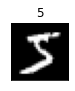

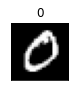

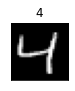

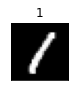

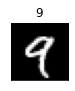

In [3]:
from matplotlib import pyplot
for i in range(5):
  pyplot.subplot(1,5,1+i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray')) 
  pyplot.title(str(train_y[i]))
  pyplot.xticks([])
  pyplot.yticks([]) 
  pyplot.show()
pyplot.show()

* Q3 .Modifiez le code ci-dessus pour afficher 10 exemples d’images pour chaque chiffre compris entre 
0 et 9 de l’ensemble de données de formation

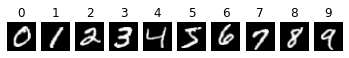

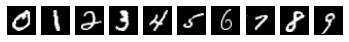

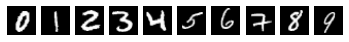

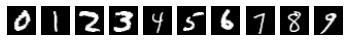

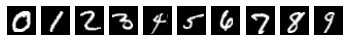

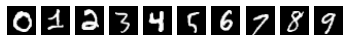

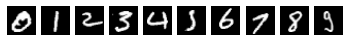

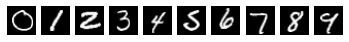

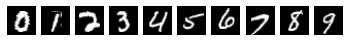

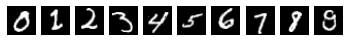

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Créer une figure de 10 lignes et 5 colonnes
# Pour chaque chiffre entre 0 et 9
  # Trouver les indices de l'ensemble de données de formation qui correspondent au chiffre i
  # Pour chaque exemple choisi
  # Afficher 10 exemples d'images pour chaque chiffre
for j in range(10):
    plt.figure()
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(train_X[train_y == i][j], cmap='gray')
        if(j == 0) :
          plt.title(str(i))
        #plt.title(str(train_y[train_y==i][j]))
        plt.axis('off')
    plt.show()

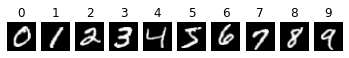

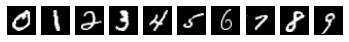

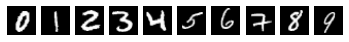

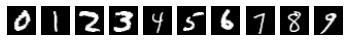

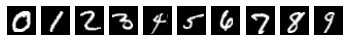

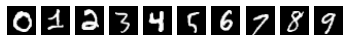

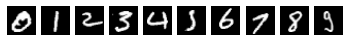

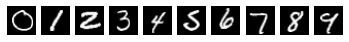

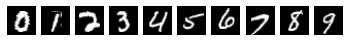

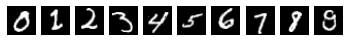

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Afficher 10 exemples d'images pour chaque chiffre
for j in range(10):
    plt.figure()
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(train_X[train_y == i][j], cmap='gray')
        if(j == 0) :
          plt.title(str(i))
        plt.axis('off')
    plt.show()

* Q4: Définissez maintenant une fonction display_dataset(X, y) que vous pourrez réutiliser sur différents jeux de données. Utilisez cette fonction pour afficher 10 exemples d’images de l’ensemble de données de test

In [6]:
def display_dataset(X, y):
  import matplotlib.pyplot as plt
  import numpy as np

  # Afficher 10 exemples d'images pour chaque chiffre
  for j in range(10):
      plt.figure()
      for i in range(10):
          plt.subplot(1, 10, i+1)
          plt.imshow(train_X[train_y == i][j], cmap='gray')
          if(j == 0) :
            plt.title(str(i))
          plt.axis('off')
      plt.show()

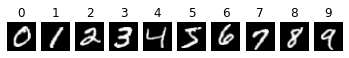

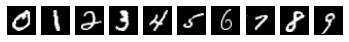

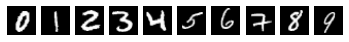

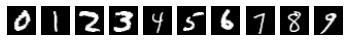

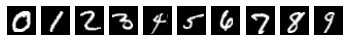

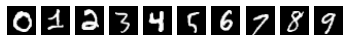

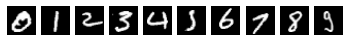

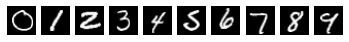

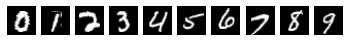

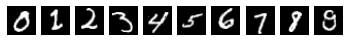

In [7]:
display_dataset(train_X, train_y)

* 3.1. Préparer les données pour la classification du chiffre 0 par rapport au chiffre 1
* Q5: Créer de nouveaux ensembles de données train01_X, train01_y, test01_X et test01_y contenant uniquement les images affichant les 0 et 1 chiffres. Utilisez votre fonction display_dataset pour afficher 10 exemples d’images de l’ensemble de données train01.

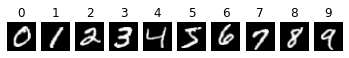

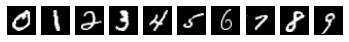

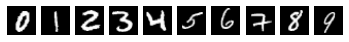

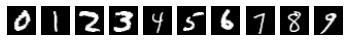

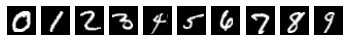

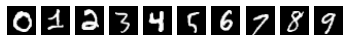

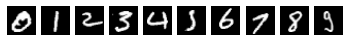

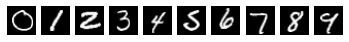

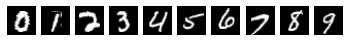

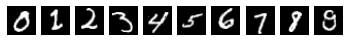

In [8]:
# Creation de nouveaux datasets contenant seulement 0 et 1 
train01_X, train01_y, test01_X , test01_y = train_X[(train_y == 0)| (train_y ==1) ], train_y[(train_y ==0 )| (train_y ==1) ], test_X[(test_y ==0)| (test_y ==1) ], test_y[(test_y ==0) | (test_y == 1)]
# Display the new dataset using the display_dataset function
display_dataset(train01_X, train01_y)


### 3.2 Activation de neuronne
* Q6: Copiez ce code et testez-le en calculant l’activation du neurone pour la première image du jeu de 
données comme suit 

In [9]:

class Neuron:
 def __init__(self, n_input):
   self.n_input = n_input
   self.offset = np.random.randn()
   self.connections = np.random.randn(n_input)
 def compute(self, input_image):
   input_vector = input_image.ravel() # transform image to a vector of pixels
   # linear weighted sum of inputs
   output = self.offset + np.sum(self.connections * input_vector)
   # apply ReLU nonlinearity
   if output < 0:
     output = 0
     return output

In [10]:
my_neuron = Neuron(28*28)
print(my_neuron.compute(train01_X[0]))

None


* Q7: Modifier le code de la méthode de calcul (compute) pour remplacer l’activation ReLU par la fonction sigmoïde. Tester.
Pour ne pas effacer votre réponse à la question précédente, veuillez copier la classe Neurone complète dans un nouveau bloc de code

In [11]:
import math
import numpy as np
np.random.seed(0)
import math

class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = np.random.randn()
    self.connections = np.random.randn(n_input)
  def compute(self, input_image):
    input_vector = input_image.ravel() # transform image to a vector of pixels
    # linear weighted sum of inputs
    output = self.offset + np.sum(self.connections * input_vector)
    # apply sigmoid nonlinearity
    output = 1 / (1 + math.exp(-output))
    return output

# Créer un neurone avec 28*28 entrées (taille de l'image en pixels)
my_neuron = Neuron(28*28) 

# Calculer l'activation du neurone pour la première image de l'ensemble de données train01
output = my_neuron.compute(train01_X[0]) 
print(output)

9.64338658958626e-13


### 3.4. Calculez plusieurs images à la fois.
* Q8: Modifier le code de la méthode de calcul (compute)de sorte que son entrée n’est plus une seule image, mais un ensemble d’images, d’entrées, et sa sortie est un vecteur de probabilités. Testez-le sur le kit de formation train01_X
Astuce : vous devriez éviter d’utiliser une boucle for car elle sera trop lente. Effectuez plutôt des opérations de tableau en utilisant les fonctions Numpy appropriées.

In [12]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = np.random.randn()
    self.connections = np.random.randn(n_input)
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs

# Créer un neurone avec 28*28 entrées (taille de l'image en pixels)
my_neuron = Neuron(28*28) 

# Calculer l'activation du neurone pour l'ensemble de données train01_X
outputs = my_neuron.compute(train01_X) 
print(outputs)


[9.64338659e-13 5.55489160e-01 1.22289590e-04 ... 1.67970191e-01
 1.72993459e-05 9.02689031e-01]


#### Q9: Écrire une nouvelle méthode classify(self, inputs) qui renvoie un vecteur de zéros et de uns selon que les probabilités calculées par compute pour être un « chiffre 1 » sont supérieures à 0,5. Testez-le sur le kit de formation train01_X.

In [13]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = np.random.randn()
    self.connections = np.random.randn(n_input)
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)



In [14]:
# Créer un neurone avec 28*28 entrées (taille de l'image en pixels)
my_neuron = Neuron(28*28) 

# Calculer l'activation du neurone pour l'ensemble de données train01_X
classification = my_neuron.classify(train01_X)
print(classification)

[0 1 0 ... 0 0 1]


#### Q10 :  Write Écrire une nouvelle méthode score(self, inputs, outputs) qui renvoie le pourcentage de classifications correctes par le neurone. Tester cette fonction sur train01_X and train01_y: avant tout apprentissage, on s’attend à ce que ce pourcentage soit d’environ 50 %.

In [15]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = np.random.randn()
    self.connections = np.random.randn(n_input)
  
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)

# Q10
  def score(self, inputs, outputs):
        predictions = self.classify(inputs)
        predictions_correct = predictions == outputs
        return predictions_correct.mean()


In [16]:
my_neuron = Neuron(28*28)
score = my_neuron.score(train01_X, train01_y)
print("Pourcentage de classement corrects classifications avant entrainement : ",score*100)

Pourcentage de classement corrects classifications avant entrainement :  48.164232135807346


#### Q 11: Modifier l’initialisation du neurone avec self.offset = 0.
Q12: Écrire une méthode loss(self, inputs, outputs) qui calcule la perte sur une donnée ensemble d’images et de véritables étiquettes

In [17]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = 0             # Q11 
    self.connections = np.random.randn(n_input)
  
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)

# Q10
  def score(self, inputs, outputs):
        predictions = self.classify(inputs)
        predictions_correct = predictions == outputs
        return np.mean(predictions_correct)

# Q12
  def loss(self, inputs, outputs):
    loss = (1/inputs.shape[0]) * np.sum((self.compute(inputs) - outputs)**2)
    return loss


In [18]:
my_neuron = Neuron(28*28)
my_neuron.loss(train01_X, train01_y)

0.5106747031864282

#### Q13: Ecrire une nouvelle méthode training_step(self, training_inputs, training_outputs, learning_rate) qui modifie les connexions du neurone pour diminuer le loss. Vérifiez que le loss a diminué après un appel de la fonction training_step. 


In [19]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = 0             # Q11 
    self.connections = np.random.randn(n_input)
  
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)

# Q10
  def score(self, inputs, outputs):
        predictions = self.classify(inputs)
        predictions_correct = predictions == outputs
        return np.mean(predictions_correct)

# Q12
  def loss(self, inputs, outputs):
    loss = (1/inputs.shape[0]) * np.sum((self.compute(inputs) - outputs)**2)
    return loss

# Q13
  def training_step(self, inputs, outputs, learning_rate):
    predictions = self.compute(inputs)
    self.offset = self.offset - learning_rate * np.mean(predictions - outputs)
    self.connections = self.connections - learning_rate * np.dot(inputs.reshape(inputs.shape[0], -1).T, predictions - outputs)



In [20]:
np.random.seed(0)
my_neuron = Neuron(28*28)
initial_loss = my_neuron.loss(train01_X, train01_y)
my_neuron.training_step(train01_X, train01_y, learning_rate=0.0001)
final_loss = my_neuron.loss(train01_X, train01_y)
print("perte initiale: ", initial_loss)
print("perte finale: ", final_loss)

perte initiale:  0.5106747031864282
perte finale:  0.05873247250129551


#### Q14: Ecrivez une nouvelle methode train(self, training_inputs training_outputs, learning_rate, num_step, do_display) qui repète training_step pour num_step fois, et affiche le loss à chaque itération si do_display est vrai. 

In [21]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = 0             # Q11 
    self.connections = np.random.randn(n_input)
  
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)

# Q10
  def score(self, inputs, outputs):
        predictions = self.classify(inputs)
        predictions_correct = predictions == outputs
        return np.mean(predictions_correct)

# Q12
  def loss(self, inputs, outputs):
    loss = (1/inputs.shape[0]) * np.sum((self.compute(inputs) - outputs)**2)
    return loss

# Q13
  def training_step(self, inputs, outputs, learning_rate):
    predictions = self.compute(inputs)
    self.offset = self.offset - learning_rate * np.mean(predictions - outputs)
    self.connections = self.connections - learning_rate * np.dot(inputs.reshape(inputs.shape[0], -1).T, predictions - outputs)

#Q14
  def train(self, inputs, outputs, learning_rate, num_step, do_display=True):
    for i in range(num_step):
      self.training_step(inputs, outputs, learning_rate)
      if do_display:
        current_loss = self.loss(inputs, outputs)
        print("Etape {} Loss: {}".format(i, current_loss))



In [22]:
np.random.seed(0)
my_neuron = Neuron(28*28)
my_neuron.train(train01_X, train01_y, learning_rate=0.0001, num_step=500)

Etape 0 Loss: 0.05873247250129551
Etape 1 Loss: 0.03151682687835455
Etape 2 Loss: 0.02609312186466936
Etape 3 Loss: 0.022523225820970126
Etape 4 Loss: 0.019765879927629196
Etape 5 Loss: 0.01760370582574018
Etape 6 Loss: 0.0159032971394637
Etape 7 Loss: 0.014552024289230955
Etape 8 Loss: 0.013458699556207732
Etape 9 Loss: 0.012555580630006549
Etape 10 Loss: 0.011794862919055918
Etape 11 Loss: 0.011143221189475989
Etape 12 Loss: 0.010577158080857591
Etape 13 Loss: 0.010079753131334121
Etape 14 Loss: 0.009638530396156312
Etape 15 Loss: 0.00924407005555373
Etape 16 Loss: 0.00888909456524041
Etape 17 Loss: 0.008567858618766742
Etape 18 Loss: 0.008275735954103752
Etape 19 Loss: 0.008008935185305207
Etape 20 Loss: 0.007764301302340844
Etape 21 Loss: 0.007539174885558917
Etape 22 Loss: 0.0073312907270032535
Etape 23 Loss: 0.007138703607013705
Etape 24 Loss: 0.006959732868680415
Etape 25 Loss: 0.006792920036022192
Etape 26 Loss: 0.006636995524563848
Etape 27 Loss: 0.006490851762585163
Etape 28 

### 3.6. Apprentissage et Test
* Q15: Effectuer l’apprentissage sur l’échantillon d’apprentissage puis calculer la perte et le score sur les données de forma. Déterminer manuellement les valeurs optimales approximatives pour le tauxd’apprentissage (learning_rate) et le nombre d’étapes (num_step).

In [23]:
np.random.seed(0)
my_neuron.train(train01_X, train01_y,0.0001, 1500, False)
print(my_neuron.score(test01_X, test01_y))
print(my_neuron.loss(test01_X, test01_y))

0.9976359338061466
0.0019561775656146783


In [24]:
# on va faire une boucle sur les hyperparamètres et calculer le score sur le jeu de test
# puis nous garderons le meilleur score et les hyperparamètres associés
best_score = 0
best_learning_rate = 0
best_num_steps = 0
for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    for num_steps in [10, 50, 100, 500, 1000]:
        my_neuron = Neuron(28*28)
        my_neuron.train(train01_X, train01_y, learning_rate, num_steps, False)
        score = my_neuron.score(test01_X, test01_y)
        if score > best_score:
            best_score = score
            best_learning_rate = learning_rate
            best_num_steps = num_steps
print("meilleure score: ", best_score)
print("meilleure learning rate: ", best_learning_rate)
print("meilleure num steps: ", best_num_steps)

<ipython-input-21-9564e75f7ed5>:16: RuntimeWarning: overflow encountered in exp
  outputs = 1 / (1 + np.exp(-weighted_sums))


meilleure score:  0.9995271867612293
meilleure learning rate:  0.001
meilleure num steps:  100


* Le learning rate optimal est de 0.001 avec un nombre d'itérations num_steps = 100

#### Q16: Écrivez une nouvelle méthode show_outputs(self, inputs) qui affiche dans une figure les images d’entrée et la probabilité qu’elles soient reconnues comme « chiffre 1 ». Utilisez-la pour montrer quelques exemples. 

In [25]:
np.random.seed(0)
class Neuron:
  def __init__(self, n_input):
    self.n_input = n_input
    self.offset = 0             # Q11 
    self.connections = np.random.randn(n_input)
  
  def compute(self, input_images):
    # Transformer chaque image en un vecteur de pixels
    input_vectors = np.array([image.ravel() for image in input_images])
    # Calculer le produit matriciel avec les poids de connexion
    weighted_sums = np.dot(input_vectors, self.connections)
    # Ajouter l'offset à chaque somme pondérée
    weighted_sums += self.offset
    # Appliquer la fonction sigmoïde
    outputs = 1 / (1 + np.exp(-weighted_sums))
    return outputs
    
    # Q9
  def classify(self, inputs):
    outputs = self.compute(inputs)
    return np.where(outputs > 0.5, 1, 0)

# Q10
  def score(self, inputs, outputs):
        predictions = self.classify(inputs)
        predictions_correct = predictions == outputs
        return np.mean(predictions_correct)

# Q12
  def loss(self, inputs, outputs):
    loss = (1/inputs.shape[0]) * np.sum((self.compute(inputs) - outputs)**2)
    return loss

# Q13
  def training_step(self, inputs, outputs, learning_rate):
    predictions = self.compute(inputs)
    self.offset = self.offset - learning_rate * np.mean(predictions - outputs)
    self.connections = self.connections - learning_rate * np.dot(inputs.reshape(inputs.shape[0], -1).T, predictions - outputs)

#Q14
  def train(self, inputs, outputs, learning_rate, num_step, do_display=True):
    for i in range(num_step):
      self.training_step(inputs, outputs, learning_rate)
      if do_display:
        current_loss = self.loss(inputs, outputs)
        print("Etape {} Loss: {}".format(i, current_loss))


# Q16
  def show_outputs(self, inputs):
    import matplotlib.pyplot as plt
    predictions = self.compute(inputs)
    for i in range(inputs.shape[0]):
      plt.imshow(inputs[i].reshape(28, 28), cmap='gray')
      plt.title("prediction: " + str(predictions[i]))
      plt.show()



Etape 0 Loss: 0.4676667981928176
Etape 1 Loss: 0.0168567146135515
Etape 2 Loss: 0.013040533905710769
Etape 3 Loss: 0.011058539199009535
Etape 4 Loss: 0.009605261440550596
Etape 5 Loss: 0.008671190350415525
Etape 6 Loss: 0.007812573075260435
Etape 7 Loss: 0.0073867866836060956
Etape 8 Loss: 0.007224242332788709
Etape 9 Loss: 0.0070055355048950245
Etape 10 Loss: 0.0066007233936176525
Etape 11 Loss: 0.006271680222860254
Etape 12 Loss: 0.006036051382766869
Etape 13 Loss: 0.005830367859671267
Etape 14 Loss: 0.0056266196571580765
Etape 15 Loss: 0.005453475330831765
Etape 16 Loss: 0.005332310159599321
Etape 17 Loss: 0.0051487119039690795
Etape 18 Loss: 0.0049152878729417475
Etape 19 Loss: 0.00469099585641727
Etape 20 Loss: 0.004541218605542249
Etape 21 Loss: 0.004409476538441862
Etape 22 Loss: 0.004266769682498112
Etape 23 Loss: 0.004125611674993404
Etape 24 Loss: 0.00400162985919384
Etape 25 Loss: 0.0039051945922709036
Etape 26 Loss: 0.003839011671821156
Etape 27 Loss: 0.003790292546430763
E

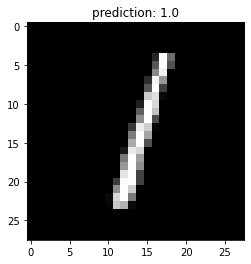

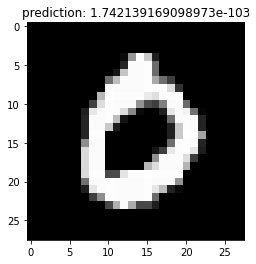

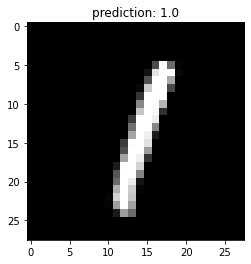

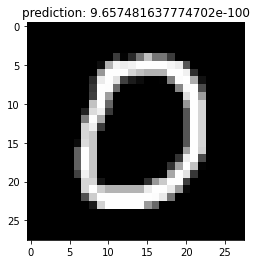

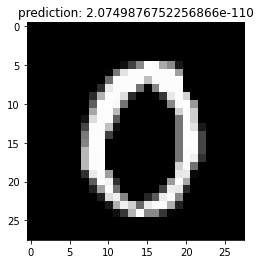

In [26]:
my_neuron = Neuron(28*28)
my_neuron.train(train01_X, train01_y,0.001, 100, True)
my_neuron.show_outputs(test01_X[:5])

#### Q17: Après avoir entrainé le réseau de neurone, affichez les connexions sous forme d’image 28 × 28. Observez-vous un modèle intéressant dans cette image que vous pourriez commenter

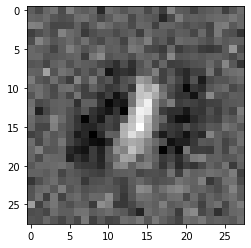

In [35]:
import matplotlib.pyplot as plt
my_neuron = Neuron(28*28)
my_neuron.train(train01_X, train01_y,0.001, 100, False)
plt.imshow(my_neuron.connections.reshape(28, 28), cmap='gray') # 28*28=784
plt.show()

* L'image est floue, mais on décèle une sorte de zone claire au centre et du gris foncé autour puis tout autour du gris foncé des variations de gris plus claires

### FIN DU PROJET : Réseaux de neuronnes
### International Data Science Institute (IDSI) 